In [58]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'


# Вивести перші рядки таблиці за допомогою методу head

In [59]:
table = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]
print(table)

               Регіон   1950   1960   1970   1990   2000   2012  2014  2019
0                Крим 23.000 20.600 16.000 13.000  7.300 12.600     —     —
1           Вінницька 22.400 19.200 14.200 12.400  8.400 11.200  10.9   7.6
2           Волинська 24.700 25.000 17.900 15.300 11.200 14.800  14.1  10.1
3    Дніпропетровська 20.400 20.400 15.100 12.300  7.100 11.200  11.1   7.1
4            Донецька 27.100 21.400 14.000 10.900  6.100  9.800   8.2     —
5         Житомирська 26.100 22.300 15.900 12.900  8.900 12.200  12.0   7.9
6        Закарпатська 31.400 27.300 20.700 16.800 11.500 15.100  14.6  10.4
7          Запорізька 21.900 19.700 15.000 12.400  7.100 10.600  10.6   6.8
8   Івано-Франківська 24.300 24.800 18.200 15.500 10.300 12.400  12.2   8.8
9            Київська 20.400 18.900 15.600 12.300  7.300 12.200  12.1   8.0
10     Кіровоградська 21.600 17.100 14.500 12.600  7.900 11.000  10.8   6.8
11          Луганська 26.200 23.500 14.400 11.600  6.200  9.600   5.1     —
12          

# Вивести перші рядки таблиці за допомогою методу head

In [60]:
table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000,20.600,16.000,13.000,7.300,12.600,—,—
1,Вінницька,22.400,19.200,14.200,12.400,8.400,11.200,10.9,7.6
2,Волинська,24.700,25.000,17.900,15.300,11.200,14.800,14.1,10.1
3,Дніпропетровська,20.400,20.400,15.100,12.300,7.100,11.200,11.1,7.1
4,Донецька,27.100,21.400,14.000,10.900,6.100,9.800,8.2,—


# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [61]:
table.shape

(28, 9)

# Замініть у таблиці значення "—" на значення NaN

In [62]:
import numpy as np
table.replace("—", np.nan, inplace=True)
print(table)

               Регіон   1950   1960   1970   1990   2000   2012  2014  2019
0                Крим 23.000 20.600 16.000 13.000  7.300 12.600   NaN   NaN
1           Вінницька 22.400 19.200 14.200 12.400  8.400 11.200  10.9   7.6
2           Волинська 24.700 25.000 17.900 15.300 11.200 14.800  14.1  10.1
3    Дніпропетровська 20.400 20.400 15.100 12.300  7.100 11.200  11.1   7.1
4            Донецька 27.100 21.400 14.000 10.900  6.100  9.800   8.2   NaN
5         Житомирська 26.100 22.300 15.900 12.900  8.900 12.200  12.0   7.9
6        Закарпатська 31.400 27.300 20.700 16.800 11.500 15.100  14.6  10.4
7          Запорізька 21.900 19.700 15.000 12.400  7.100 10.600  10.6   6.8
8   Івано-Франківська 24.300 24.800 18.200 15.500 10.300 12.400  12.2   8.8
9            Київська 20.400 18.900 15.600 12.300  7.300 12.200  12.1   8.0
10     Кіровоградська 21.600 17.100 14.500 12.600  7.900 11.000  10.8   6.8
11          Луганська 26.200 23.500 14.400 11.600  6.200  9.600   5.1   NaN
12          

# Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [63]:
table.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [64]:
cols_to_convert = table.columns.difference(['Регіон'])
table[cols_to_convert] = table[cols_to_convert].apply(pd.to_numeric, errors='coerce')
table.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [65]:
table_without_region = table.drop(columns=['Регіон'])
table_without_region.isnull().sum() / len(table) * 100

1950    7.143
1960    3.571
1970    3.571
1990    0.000
2000    0.000
2012    0.000
2014    7.143
2019   14.286
dtype: float64

# Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [66]:
table = table[table["Регіон"] != "Україна"]
print(table)

               Регіон   1950   1960   1970   1990   2000   2012   2014   2019
0                Крим 23.000 20.600 16.000 13.000  7.300 12.600    NaN    NaN
1           Вінницька 22.400 19.200 14.200 12.400  8.400 11.200 10.900  7.600
2           Волинська 24.700 25.000 17.900 15.300 11.200 14.800 14.100 10.100
3    Дніпропетровська 20.400 20.400 15.100 12.300  7.100 11.200 11.100  7.100
4            Донецька 27.100 21.400 14.000 10.900  6.100  9.800  8.200    NaN
5         Житомирська 26.100 22.300 15.900 12.900  8.900 12.200 12.000  7.900
6        Закарпатська 31.400 27.300 20.700 16.800 11.500 15.100 14.600 10.400
7          Запорізька 21.900 19.700 15.000 12.400  7.100 10.600 10.600  6.800
8   Івано-Франківська 24.300 24.800 18.200 15.500 10.300 12.400 12.200  8.800
9            Київська 20.400 18.900 15.600 12.300  7.300 12.200 12.100  8.000
10     Кіровоградська 21.600 17.100 14.500 12.600  7.900 11.000 10.800  6.800
11          Луганська 26.200 23.500 14.400 11.600  6.200  9.600 

# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [67]:
mean_values = table.drop(columns=['Регіон']).mean()
table.fillna(mean_values, inplace=True)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

print(table)

               Регіон   1950   1960   1970   1990   2000   2012   2014   2019
0                Крим 23.000 20.600 16.000 13.000  7.300 12.600 11.144  8.017
1           Вінницька 22.400 19.200 14.200 12.400  8.400 11.200 10.900  7.600
2           Волинська 24.700 25.000 17.900 15.300 11.200 14.800 14.100 10.100
3    Дніпропетровська 20.400 20.400 15.100 12.300  7.100 11.200 11.100  7.100
4            Донецька 27.100 21.400 14.000 10.900  6.100  9.800  8.200  8.017
5         Житомирська 26.100 22.300 15.900 12.900  8.900 12.200 12.000  7.900
6        Закарпатська 31.400 27.300 20.700 16.800 11.500 15.100 14.600 10.400
7          Запорізька 21.900 19.700 15.000 12.400  7.100 10.600 10.600  6.800
8   Івано-Франківська 24.300 24.800 18.200 15.500 10.300 12.400 12.200  8.800
9            Київська 20.400 18.900 15.600 12.300  7.300 12.200 12.100  8.000
10     Кіровоградська 21.600 17.100 14.500 12.600  7.900 11.000 10.800  6.800
11          Луганська 26.200 23.500 14.400 11.600  6.200  9.600 

# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [68]:
average_birth_rate_2019 = table['2019'].mean()
print(average_birth_rate_2019)

8.017391304347827


In [69]:
regions_above_average = table[table['2019'] > average_birth_rate_2019]['Регіон'].tolist()
print(regions_above_average)

['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


# У якому регіоні була найвища народжуваність у 2014 році?

In [70]:

max_birth_rate_2014 = table.loc[table['2014'].idxmax(), 'Регіон']
print(max_birth_rate_2014)

Рівненська


# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

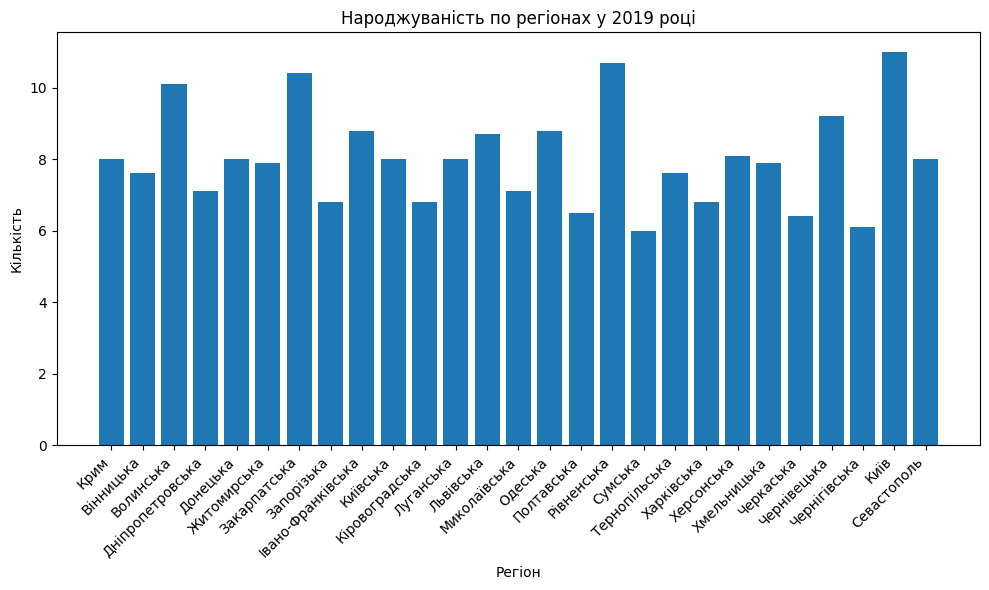

In [71]:
df_2019 = table[['Регіон', '2019']]
plt.figure(figsize=(10, 6))
plt.bar(df_2019['Регіон'], df_2019['2019'])
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Кількість')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Побудувати діаграму народжуваності по рокам по регіону Житомирська

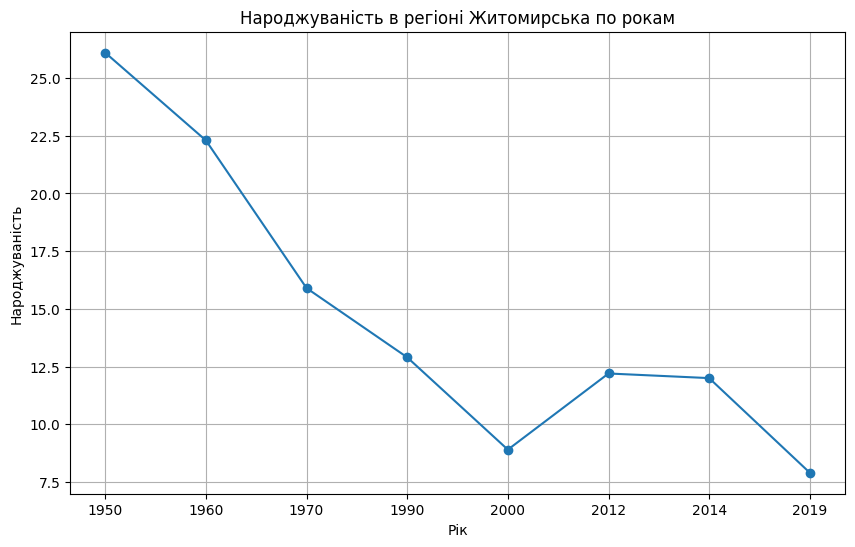

In [72]:
zhytomyr = table[table['Регіон'] == 'Житомирська']

zhytomyr = zhytomyr[zhytomyr['2019'] != '-']
zhytomyr['2019'] = zhytomyr['2019'].astype(float)

plt.figure(figsize=(10, 6))
plt.plot(zhytomyr.columns[1:], zhytomyr.iloc[0, 1:], marker='o', linestyle='-')

plt.xlabel('Рік')
plt.ylabel('Народжуваність')
plt.title('Народжуваність в регіоні Житомирська по рокам')

plt.grid(True)
plt.show()

# Побудувати кругову діаграму по народжуваності по регіонам за 2014 рік

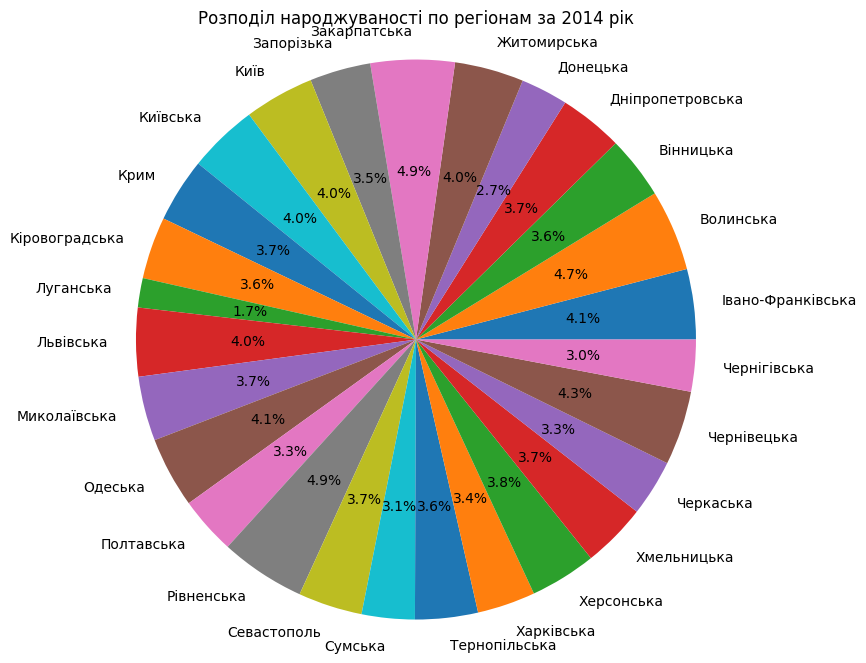

: 

In [73]:
table_2014 = table[['Регіон', '2014']]
total_births_by_region = table_2014.groupby('Регіон')['2014'].sum()
plt.figure(figsize=(10, 8))
plt.pie(total_births_by_region, labels=total_births_by_region.index, autopct='%1.1f%%')
plt.title('Розподіл народжуваності по регіонам за 2014 рік')

plt.axis('equal')
plt.show()